In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.chdir(r'C:\Users\u3554218\Downloads')

In [4]:
msf = pd.read_csv('msf.csv')

In [5]:
mse = pd.read_csv('mse.csv')

In [6]:
mse.PAYDT = mse.PAYDT.apply(str)

In [7]:
mse.PAYDT = pd.to_datetime(mse.PAYDT,format = '%Y%m%d')

In [8]:
mse['Paymonth'] = mse.PAYDT.apply(lambda x:x.month)

In [9]:
mse['PayYear'] = mse.PAYDT.apply(lambda x:x.year)

In [10]:
div = mse.dropna(subset = ['DISTCD'])
div['DISTCD'] = div['DISTCD'].astype(str)
div.insert(loc = 2,column = 'freq',value = div['DISTCD'].apply(lambda x:x[2]))
## filter out the stocks that pay dividends

divPayCom = div[div['freq'].isin(['3','4','5'])]

C:\winprogs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
##如果是季度支付股息，那么三个月前支付过股息，这个月就会支付股息。

In [12]:
## portfolio 2 long companies in the month of their predicted dividend month, and short 
##same companies in other months

In [13]:
divPayCom.columns

Index(['PERMNO', 'DISTCD', 'freq', 'DIVAMT', 'DCLRDT', 'EXDT', 'PAYDT',
       'Paymonth', 'PayYear'],
      dtype='object')

In [14]:
divComList = list(set(divPayCom['PERMNO']))

In [15]:
msf.date = pd.to_datetime(msf.date,format = '%Y%m%d')

In [16]:
msf.sort_values(by = ['PERMNO','date'],inplace = True)

In [17]:
msf['prc_lag1'] = msf.groupby(['PERMNO'])['PRC'].shift(1)

In [138]:
msf.query('RET == "B"&prc_lag1 >=5')

,PERMNO,date,SHRCD,HEXCD,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,SPREAD,RETX,prc_lag1
46662,10268,1969-04-30,10.0,3,16.0000,17.2500,NaN,114.0,B,NaN,NaN,576.0,NaN,B,17.250
57551,10342,1996-05-31,11.0,3,10.1250,11.3750,NaN,8984.0,B,NaN,NaN,7602.0,NaN,B,10.375
57697,10343,1988-08-31,11.0,1,29.7500,30.3750,NaN,20.0,B,NaN,NaN,3598.0,NaN,B,30.000
107294,10663,1929-11-27,10.0,1,22.0000,24.0000,NaN,63.0,B,NaN,NaN,175.0,NaN,B,25.500
149360,10942,2007-02-28,11.0,3,NaN,NaN,NaN,NaN,B,NaN,NaN,202005.0,NaN,B,19.490
196436,11287,1965-04-30,10.0,3,30.1250,30.2500,NaN,298.0,B,NaN,NaN,1733.0,NaN,B,30.250
266333,11745,2002-03-28,11.0,2,7.0000,8.8950,NaN,118.0,B,NaN,NaN,1380.0,NaN,B,7.490
290341,11896,2007-10-31,11.0,3,28.2600,28.2600,NaN,477577.0,B,NaN,NaN,320553.0,NaN,B,29.350
357590,12362,2013-09-30,11.0,3,18.4000,19.2000,NaN,667.0,B,NaN,NaN,3222.0,NaN,B,18.950
373027,12503,2007-02-28,11.0,1,45.3800,47.7500,NaN,268161.0,B,NaN,NaN,75351.0,NaN,B,44.240


In [19]:
msf_divCom = msf.query('PERMNO in(@divComList)')

In [20]:
msf_divCom.dtypes

PERMNO               int64
date        datetime64[ns]
SHRCD              float64
HEXCD                int64
BIDLO              float64
ASKHI              float64
PRC                float64
VOL                float64
RET                 object
BID                float64
ASK                float64
SHROUT             float64
SPREAD             float64
RETX                object
prc_lag1           float64
dtype: object

In [21]:
msf_divCom.date = pd.to_datetime(msf_divCom.date,format = '%Y%m%d')

C:\winprogs\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
def end_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)  # this will never fail
    return next_month - datetime.timedelta(days=next_month.day)

In [23]:
import datetime

In [24]:
msf_divCom['end_of_month'] = msf_divCom['date'].apply(end_of_month)

C:\winprogs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
divPayCom.dropna(subset = ['PAYDT'],inplace = True)

C:\winprogs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
divPayCom['end_of_month'] = divPayCom.PAYDT.apply(end_of_month)

C:\winprogs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
divPayCom.columns 

Index(['PERMNO', 'DISTCD', 'freq', 'DIVAMT', 'DCLRDT', 'EXDT', 'PAYDT',
       'Paymonth', 'PayYear', 'end_of_month'],
      dtype='object')

In [28]:
mse.columns

Index(['PERMNO', 'DISTCD', 'DIVAMT', 'DCLRDT', 'EXDT', 'PAYDT', 'Paymonth',
       'PayYear'],
      dtype='object')

In [29]:
divComInfo = pd.merge(msf_divCom,divPayCom[['PERMNO','DISTCD','DIVAMT','freq','PAYDT','Paymonth','PayYear','end_of_month']],
                     on = ['PERMNO','end_of_month'],
                     how = 'outer')

In [30]:
msf.query('PERMNO == 10001 & date== "1986-03-31"')

,PERMNO,date,SHRCD,HEXCD,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,SPREAD,RETX,prc_lag1
22,10001,1986-03-31,11.0,2,-6.25,-6.375,-6.3125,335.0,0.025200,NaN,NaN,985.0,0.125,0.010000,-6.25


In [31]:
divComInfo.dropna(subset = ['SHRCD'],inplace = True)

In [32]:
divComInfo['freq'].fillna(method = 'bfill',inplace = True)

In [33]:
divComInfo.head()

,PERMNO,date,SHRCD,HEXCD,BIDLO,ASKHI,PRC,VOL,RET,BID,...,SPREAD,RETX,prc_lag1,end_of_month,DISTCD,DIVAMT,freq,PAYDT,Paymonth,PayYear
1,10001,1986-01-31,11.0,2.0,-5.7500,-6.3125,-6.1250,667.0,C,NaN,...,0.250,C,NaN,1986-01-31,NaN,NaN,3,NaT,NaN,NaN
2,10001,1986-02-28,11.0,2.0,-6.1250,-6.3750,-6.2500,1067.0,0.020408,NaN,...,0.250,0.020408,-6.1250,1986-02-28,NaN,NaN,3,NaT,NaN,NaN
3,10001,1986-03-31,11.0,2.0,-6.2500,-6.3750,-6.3125,335.0,0.025200,NaN,...,0.125,0.010000,-6.2500,1986-03-31,1232.0,0.095,3,1986-03-28,3.0,1986.0
4,10001,1986-04-30,11.0,2.0,-6.3125,-6.3750,-6.3750,225.0,0.009901,NaN,...,0.250,0.009901,-6.3125,1986-04-30,NaN,NaN,3,NaT,NaN,NaN
5,10001,1986-05-30,11.0,2.0,-6.3125,-6.3750,-6.3125,217.0,-0.009804,NaN,...,0.125,-0.009804,-6.3750,1986-05-31,NaN,NaN,3,NaT,NaN,NaN


In [34]:
divComInfo.insert(loc = 2,column= 'month',value = divComInfo.date.apply(lambda x:x.month))

In [35]:
divComInfo['freq_lag1'] = divComInfo.groupby(['PERMNO','month'])['freq'].shift(1)

In [36]:
divComInfo.columns

Index(['PERMNO', 'date', 'month', 'SHRCD', 'HEXCD', 'BIDLO', 'ASKHI', 'PRC',
       'VOL', 'RET', 'BID', 'ASK', 'SHROUT', 'SPREAD', 'RETX', 'prc_lag1',
       'end_of_month', 'DISTCD', 'DIVAMT', 'freq', 'PAYDT', 'Paymonth',
       'PayYear', 'freq_lag1'],
      dtype='object')

In [37]:
divComInfo['mcap'] = divComInfo['PRC']*divComInfo['SHROUT']

In [38]:
divComInfo.sort_values(by = ['PERMNO','date'],inplace = True)

In [39]:
divComInfo['mcap_lag1'] = divComInfo.groupby(['PERMNO'])['mcap'].shift(1)

In [40]:
divComInfo.head()

,PERMNO,date,month,SHRCD,HEXCD,BIDLO,ASKHI,PRC,VOL,RET,...,end_of_month,DISTCD,DIVAMT,freq,PAYDT,Paymonth,PayYear,freq_lag1,mcap,mcap_lag1
1,10001,1986-01-31,1,11.0,2.0,-5.7500,-6.3125,-6.1250,667.0,C,...,1986-01-31,NaN,NaN,3,NaT,NaN,NaN,NaN,-6033.1250,NaN
2,10001,1986-02-28,2,11.0,2.0,-6.1250,-6.3750,-6.2500,1067.0,0.020408,...,1986-02-28,NaN,NaN,3,NaT,NaN,NaN,NaN,-6156.2500,-6033.1250
3,10001,1986-03-31,3,11.0,2.0,-6.2500,-6.3750,-6.3125,335.0,0.025200,...,1986-03-31,1232.0,0.095,3,1986-03-28,3.0,1986.0,NaN,-6217.8125,-6156.2500
4,10001,1986-04-30,4,11.0,2.0,-6.3125,-6.3750,-6.3750,225.0,0.009901,...,1986-04-30,NaN,NaN,3,NaT,NaN,NaN,NaN,-6279.3750,-6217.8125
5,10001,1986-05-30,5,11.0,2.0,-6.3125,-6.3750,-6.3125,217.0,-0.009804,...,1986-05-31,NaN,NaN,3,NaT,NaN,NaN,NaN,-6217.8125,-6279.3750


In [41]:
mse.columns

Index(['PERMNO', 'DISTCD', 'DIVAMT', 'DCLRDT', 'EXDT', 'PAYDT', 'Paymonth',
       'PayYear'],
      dtype='object')

In [42]:
divComInfo['DIV_lag3'] = divComInfo.groupby('PERMNO')['DIVAMT'].shift(3)

In [43]:
divComInfo['DIV_lag6'] = divComInfo.groupby('PERMNO')['DIVAMT'].shift(6)

In [44]:
divComInfo['DIV_lag12'] = divComInfo.groupby('PERMNO')['DIVAMT'].shift(12)

In [46]:
## filter stocks
   #price larger than 5
   #HEXCD 123
   #SHRCD 10，11

In [57]:
divComInfo.columns

Index(['PERMNO', 'date', 'month', 'SHRCD', 'HEXCD', 'PRC', 'VOL', 'RET',
       'SHROUT', 'RETX', 'prc_lag1', 'end_of_month', 'DISTCD', 'DIVAMT',
       'freq', 'PAYDT', 'Paymonth', 'PayYear', 'freq_lag1', 'mcap',
       'mcap_lag1', 'DIV_lag3', 'DIV_lag6', 'DIV_lag12'],
      dtype='object')

In [191]:
divComInfo = divComInfo.query('prc_lag1 >= 5&HEXCD in([1,2,3]) & SHRCD in([10,11])&RET != "B"&RET != "C"')

In [192]:
divComInfo.head()

,PERMNO,date,month,SHRCD,HEXCD,PRC,VOL,RET,SHROUT,RETX,...,freq,PAYDT,Paymonth,PayYear,freq_lag1,mcap,mcap_lag1,DIV_lag3,DIV_lag6,DIV_lag12
10,10001,1986-10-31,10,11.0,2.0,6.625,362.0,0.039216,991.0,0.039216,...,3,0,0.0,0.0,0.0,6565.375,6317.625,0.000,0.000,0.0
11,10001,1986-11-28,11,11.0,2.0,7.000,312.0,0.056604,991.0,0.056604,...,3,0,0.0,0.0,0.0,6937.000,6565.375,0.000,0.000,0.0
12,10001,1986-12-31,12,11.0,2.0,7.000,312.0,0.015000,991.0,0.000000,...,3,1986-12-31 00:00:00,12.0,1986.0,0.0,6937.000,6937.000,0.105,0.105,0.0
13,10001,1987-01-30,1,11.0,2.0,6.750,399.0,-0.035714,991.0,-0.035714,...,3,0,0.0,0.0,3.0,6689.250,6937.000,0.000,0.000,0.0
14,10001,1987-02-27,2,11.0,2.0,6.250,365.0,-0.074074,991.0,-0.074074,...,3,0,0.0,0.0,3.0,6193.750,6689.250,0.000,0.000,0.0


In [55]:
divComInfo.pop('SPREAD')

10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16         0.500
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28         0.375
31         0.375
33         0.500
35           NaN
36           NaN
37           NaN
38           NaN
39           NaN
40           NaN
41           NaN
42           NaN
43           NaN
44           NaN
45           NaN
           ...  
2759467      NaN
2759468      NaN
2759469      NaN
2759470      NaN
2759471      NaN
2759472      NaN
2759473      NaN
2759474      NaN
2759475      NaN
2759476      NaN
2759477      NaN
2759478      NaN
2759479      NaN
2759480      NaN
2759481      NaN
2759482      NaN
2759483      NaN
2759484      NaN
2759485      NaN
2759486      NaN
2759487      NaN
2759488      NaN
2759489      NaN
2759490      NaN
2759491      NaN
2759492      NaN
2759493      NaN
2759494      N

In [63]:
divComInfo.fillna(0,inplace = True)

In [84]:
divComInfo.index

Int64Index([     10,      11,      12,      13,      14,      15,      16,
                 19,      20,      21,
            ...
            2759487, 2759488, 2759489, 2759490, 2759491, 2759492, 2759493,
            2759494, 2759495, 2759496],
           dtype='int64', length=1649434)

In [66]:
import numpy as np

In [195]:
divComInfo.freq_lag1 = divComInfo.freq_lag1.astype('float')
quarterlyDiv_long = divComInfo.query('freq_lag1 == 3&DIV_lag3 != 0')
semiAn_long = divComInfo.query('freq_lag1 == 6&DIV_lag6 != 0')
Annual_long = divComInfo.query('freq_lag1 == 12&DIV_lag12 != 0')
long = set(quarterlyDiv_long.index.tolist())|set(semiAn_long.index.tolist())|set(Annual_long.index.tolist())
short = list(set(divComInfo.index.tolist()) - long)

In [207]:
portfolio_long = pd.concat([quarterlyDiv_long,semiAn_long,Annual_long])

In [232]:
portfolio_long.RET = portfolio_long.RET.astype('float')

In [237]:
port_long = pd.DataFrame(portfolio_long.groupby('date')['RET'].mean())

In [203]:
portfolio_short = divComInfo.loc[short]

In [238]:
port_short = pd.DataFrame(portfolio_short.groupby('date')['RET'].mean())

In [247]:
port_long_short = port_long.join(port_short,how = 'outer',lsuffix='_long', rsuffix='_short')

In [248]:
port_long_short.dropna(inplace = True)

In [251]:
port_long_short['monthly_ret'] =port_long_short['RET_long'] + port_long_short['RET_short'] 

In [253]:
port_long_short['cumulative_ret'] = np.cumprod(1+port_long_short['monthly_ret'])

In [263]:
port_long_short['monthly_ret'].mean()

-0.0024693951047164335

In [257]:
import matplotlib.pyplot as plt

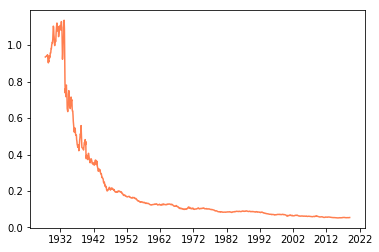

In [259]:
plt.figure()
x = port_long_short.index
y = port_long_short.cumulative_ret
plt.plot(x,y,color = 'coral')
plt.show()

In [201]:
divComInfo.RET = divComInfo.RET.astype('float')

In [205]:
portfolio_short['RET'] = portfolio_short['RET']*-1

In [209]:
port_long_short = pd.concat([portfolio_long,portfolio_short]).reset_index()

In [211]:
port_long_short.sort_values(['PERMNO','date'],inplace = True)

In [218]:
port_long_short['RET'] = port_long_short['RET'].astype('float')

date
1927-02-28   -18.864556
1927-03-31     2.846824
1927-04-30    -1.004622
1927-05-31   -18.500576
1927-06-30     6.039392
1927-07-30   -23.262014
1927-08-31    -0.931160
1927-09-30   -15.535686
1927-10-31    11.207666
1927-11-30   -33.239358
1927-12-31   -14.871561
1928-01-31    -0.649264
1928-02-29     7.294281
1928-03-31   -18.822444
1928-04-30   -13.338792
1928-05-31   -10.100818
1928-06-30    16.829811
1928-07-31    -2.309694
1928-08-31   -14.975743
1928-09-29   -13.878122
1928-10-31    -1.564664
1928-11-30   -38.371347
1928-12-31     2.919435
1929-01-31    -7.269892
1929-02-28    -1.998056
1929-03-28    11.254740
1929-04-30    -3.980675
1929-05-31    28.524294
1929-06-29   -22.763536
1929-07-31    -2.841022
                ...    
2016-07-29   -47.186461
2016-08-31   -14.887426
2016-09-30    -4.773729
2016-10-31    24.314730
2016-11-30   -93.284363
2016-12-30   -21.177654
2017-01-31    -1.213249
2017-02-28   -13.508407
2017-03-31    -0.474090
2017-04-28    -9.728297
2017-05-31 

In [221]:
portfolio_long.shape

(368289, 24)

In [222]:
len(short)

1281078

In [223]:
len(long)

368289